<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/defesa/PSD_histogram_BEST_sample_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import sklearn
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
Repetir = 40

In [3]:
# New version change routine inside MarquesGabi_Routines
# Try to improve segmentation 
# New routine is called Segment_Filter_revisited_One... Two,Three, etc
# this exemple threshold 0.4


In [4]:
#!pip install mahotas

In [5]:
def BlackWhite(Transfere,Size):

  img_name=[]
  xw=[]
  ww=[]

  with zipfile.ZipFile(Transfere, "r") as f:
    for name in f.namelist():
      img_name.append(name)
      #xw.append(cv2.imread(name))
      xw.append(cv2.resize(cv2.imread(name),(Size,Size)))

  nrow=len(img_name)
  ncol=Size*Size
  pw=np.zeros((nrow,ncol))
  #pw=[]
  for i in range(nrow):
    ww.append(cv2.cvtColor(np.array(xw[i]), cv2.COLOR_BGR2GRAY))
    pw[i,:]=ww[i].ravel()
  return ww,img_name

In [6]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip' 
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado


In [7]:
labels =[]
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    labels.append(f)
print(labels)

['Fotos_Grandes-3cdAmostra/Q6-8-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-8-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-3-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-4.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-7-3.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-9-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-1-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-6-5.jpg', 'Fotos_Grandes-3cdAmostra/Q6-2-1.jpg', 'Fotos_Grandes-3cdAmostra/Q6-5-2.jpg', 'Fotos_Grandes-3cdAmostra/Q6-4-1.jpg', 'Fotos_Grandes-3cdAmostr

In [8]:
Size=1200 # tamanho da foto
ww,img_name=BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [9]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines


In [10]:
'''
FILE='SugarSample03.zip'
img_name=[]
x_original = [] 

data_file ='xls'


file_name = zipfile.ZipFile(FILE, 'r')
file_name.extractall()

k = 0
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
      if(name[-3:] == data_file):
        #df =pd.read_csv(name)
        if( k > 0):
          df_old = df_ImgJ.copy()
        df_ImgJ = pd.read_excel(name)
        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)
        if(k > 0):
          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)
        k = k + 1
'''

'\nFILE=\'SugarSample03.zip\'\nimg_name=[]\nx_original = [] \n\ndata_file =\'xls\'\n\n\nfile_name = zipfile.ZipFile(FILE, \'r\')\nfile_name.extractall()\n\nk = 0\nwith zipfile.ZipFile(FILE, "r") as f:\n    for name in f.namelist():\n      if(name[-3:] == data_file):\n        #df =pd.read_csv(name)\n        if( k > 0):\n          df_old = df_ImgJ.copy()\n        df_ImgJ = pd.read_excel(name)\n        df_ImgJ = df_ImgJ.drop(labels=[0], axis=0)\n        if(k > 0):\n          df_ImgJ = pd.concat( [df_ImgJ, df_old], ignore_index = True)\n        k = k + 1\n'

In [11]:
#f.namelist()

In [12]:
#df_ImgJ.shape

In [13]:
#df_ImgJ.head()

In [14]:
from Segment_Filter_Revival import Segmenta  # got image provided segmented

In [15]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [16]:
# leitura dos dados
df=pd.read_excel("FotosTreinoRede.xlsx")
y = df['y']
df.drop(['Unnamed: 0','y'], axis='columns', inplace=True)

In [17]:
X =np.array(df.copy())/255.0 


X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.30, shuffle=True, random_state=42)

In [18]:
Img_Size = 28

In [19]:
# helper
def ynindicator(Y):
  N = len(Y)
  K = len(set(Y))
  I = np.zeros((N, K))
  I[np.arange(N), Y] = 1
  return I

def yback(Y_test):
  nrow, ncol = Y_test.shape
  y_class = np.zeros(nrow,dtype=int)
  y_resp = Y_test
  for k in range(nrow):
    for kk in range(K):
      if(y_resp[k,kk] == 1):
        y_class[k] = kk
  Y_test = y_class.copy()
  return Y_test

X_train = np.array(X_train)
Y_train = np.array(Y_train)
K = len(set(Y_train))

X_train = X_train.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_train = Y_train.astype(np.int32)
Y_train = ynindicator(Y_train)

X_test = np.array(X_test )
Y_test = np.array(Y_test)
X_test = X_test.reshape(-1, Img_Size, Img_Size, 1) / 255.0
Y_test = Y_test.astype(np.int32)
Y_test = ynindicator(Y_test)

# the model will be a sequence of layers

Description = '3 layers of Convolution: 64, 128, 256 '
N1 = 20
N2 = 20

# make the CNN
model = Sequential()
model.add(Conv2D(input_shape=(Img_Size, Img_Size, 1), filters=64, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=128, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(filters=256, kernel_size=(3, 3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(units=N1))
model.add(Dropout(0.2))
model.add(Dense(units=N2))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(units=K))
model.add(Activation('softmax'))


# list of losses: https://keras.io/losses/
# list of optimizers: https://keras.io/optimizers/
# list of metrics: https://keras.io/metrics/
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [20]:
# training the model
r = model.fit(X_train, Y_train, validation_data=(X_test,Y_test), 
              epochs=200, batch_size=32)

Epoch 1/200
11/11 [==============================] - 2s 149ms/step - loss: 0.5380 - accuracy: 0.7464 - val_loss: 0.6930 - val_accuracy: 0.5102
Epoch 2/200
11/11 [==============================] - 1s 130ms/step - loss: 0.3594 - accuracy: 0.8280 - val_loss: 0.6929 - val_accuracy: 0.5102
Epoch 3/200
11/11 [==============================] - 1s 130ms/step - loss: 0.1960 - accuracy: 0.9300 - val_loss: 0.6931 - val_accuracy: 0.5102
Epoch 4/200
11/11 [==============================] - 1s 128ms/step - loss: 0.1157 - accuracy: 0.9563 - val_loss: 0.6939 - val_accuracy: 0.5102
Epoch 5/200
11/11 [==============================] - 2s 139ms/step - loss: 0.1074 - accuracy: 0.9621 - val_loss: 0.6950 - val_accuracy: 0.5102
Epoch 6/200
11/11 [==============================] - 2s 140ms/step - loss: 0.1196 - accuracy: 0.9446 - val_loss: 0.6945 - val_accuracy: 0.5102
Epoch 7/200
11/11 [==============================] - 1s 136ms/step - loss: 0.0714 - accuracy: 0.9738 - val_loss: 0.6949 - val_accuracy: 0.5102

In [21]:
Y_test = yback(Y_test)

In [22]:
# pred_test= model.predict_classes(X_test)
pred_test = np.argmax(model.predict(X_test), axis=-1)

data = {'y_true': Y_test,'y_predict': pred_test}  # este dado esta no formato de dicionario

df = pd.DataFrame(data, columns=['y_true','y_predict'])


confusion_matrix = pd.crosstab(df['y_true'], df['y_predict'], rownames=['Actual'], colnames=['Predict'])
print(confusion_matrix)

y_true = df['y_true']
y_pred = df['y_predict']

  
METRICS=sklearn.metrics.classification_report(y_true, y_pred)

Predict   1
Actual     
0        72
1        75


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
print(METRICS)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.51      1.00      0.68        75

    accuracy                           0.51       147
   macro avg       0.26      0.50      0.34       147
weighted avg       0.26      0.51      0.34       147



In [24]:
pred_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [25]:
'''
img=ww[4] 
df=Segmenta(img)
df.shape
'''

'\nimg=ww[4] \ndf=Segmenta(img)\ndf.shape\n'

In [26]:
Sample3 =[2, 5, 17] # 
# [2, 5, 17] sample 7---  [4,13,25] sample 3----[0, 3, 9] sample 8

for i in range(Repetir):
  k = 0
  for i in Sample3:
    img=ww[i]
    if( k > 0):
      df_old = df_ann.copy()
    df_ann=Segmenta(img)
    if(k > 0):
      df_ann = pd.concat( [df_ann, df_old], ignore_index = True)
    k = k + 1
#df_ann = df.copy

df_teste = np.array(df_ann)
names = df_ann.columns
df_teste = pd.DataFrame(df_teste,columns=names)
Width = df_ann['Width']
#del df_ann['Width']
names = df_ann.columns
del df_ann['Width']
result = np.array(df_ann)
result = result.reshape(-1, Img_Size, Img_Size, 1) / 255.0
prediction= np.argmax(model.predict(result), axis=-1)

In [27]:
df_ann

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
0,174.002792,148.457993,138.614594,125.384926,120.971611,118.701012,116.145355,111.940567,140.646042,174.846130,180.528809,174.460144,172.223618,175.349670,178.146698,178.890030,181.424240,186.851562,193.522369,200.381729,207.017456,210.066330,207.203369,201.292358,184.902267,168.324493,141.712967,126.683067,171.634521,167.965820,164.353729,156.657120,133.760117,117.508095,118.085075,114.871635,120.308487,155.705063,172.954453,173.682831,...,163.029541,165.442856,173.554428,174.472366,171.192581,168.052582,165.559433,161.442505,157.856995,153.647827,141.175751,130.731842,131.728073,135.467850,141.581818,149.125488,153.673141,153.743073,154.937759,154.577835,149.141312,152.203156,155.326385,158.661377,158.427689,158.701294,162.752213,164.001663,162.454605,158.308289,153.472641,137.647659,116.276520,125.177574,134.653992,139.716339,137.266449,127.010803,117.221016,112.785301
1,155.358932,160.961517,159.506638,151.296295,141.695633,128.138504,118.093811,130.761658,132.531891,129.297455,126.819229,127.355522,132.373322,134.686676,134.070328,135.798141,140.351105,137.767075,128.642471,103.927925,89.006317,91.321678,93.131294,89.726936,114.258682,143.377243,150.135086,148.180527,158.399948,160.327255,159.430649,161.267029,163.476471,163.483276,155.424454,140.494766,128.891449,126.029663,126.198090,127.881729,...,153.852417,154.010483,147.893967,144.841599,145.816696,146.118439,148.300354,150.802307,156.986252,158.639832,159.691330,141.402496,141.353119,143.604095,144.036377,143.977539,144.690338,146.747147,145.906845,143.048615,138.960632,124.440231,110.482780,114.528984,133.402374,141.143799,143.843719,148.623169,157.091675,157.000763,150.332291,153.832596,156.045456,147.661911,145.052277,150.370544,155.314240,159.090775,162.827057,136.528595
2,195.583267,204.749161,215.725769,219.451218,222.041229,223.955048,223.087128,219.036011,209.330261,184.635880,149.031387,122.441673,114.123734,112.783012,113.279167,110.272087,107.463837,106.948593,106.934135,104.865799,101.261612,99.784248,94.296707,89.276085,86.950760,86.318558,80.214836,77.631271,193.364716,199.561096,209.016617,216.788864,220.009216,221.803635,219.995682,182.395828,139.814087,117.186829,109.084328,110.094482,...,141.267471,139.497070,138.149277,137.602661,139.632507,144.701141,145.970154,144.968597,142.821472,140.727310,137.777466,138.343796,126.987076,126.904594,122.310257,120.520775,131.304703,143.293640,148.684525,149.482300,146.701767,144.324402,143.048019,142.209595,141.724533,141.129883,141.375809,140.132965,138.859955,137.322250,135.422897,134.793793,137.239151,142.326263,143.750381,142.849808,141.418579,140.389343,139.654968,137.690063
3,118.147942,109.213028,100.142029,125.964508,133.899429,134.207123,134.201202,129.372787,128.390533,126.615395,126.005928,118.881660,114.485222,113.396454,113.408287,112.177521,112.029594,115.106522,124.366867,128.733749,123.727821,109.609482,105.964508,104.710068,102.644981,100.171600,99.639069,101.840240,112.147942,112.065102,107.893501,123.538467,132.869843,135.473389,135.029602,129.183441,128.615387,125.869827,126.301788,123.011848,...,119.538475,120.461555,124.745575,133.810669,146.094681,153.656815,171.455627,173.621323,136.094696,128.520721,130.029587,123.816589,118.041428,118.242615,117.745575,113.177521,111.307693,118.159775,130.686401,132.000015,126.408295,121.733742,121.798828,120.757408,116.284027,110.627228,109.023682,108.609467,112.153854,113.905334,119.349121,122.189369,125.053268,138.556229,159.514801,161.893494,139.171600,133.372803,131.011841,127.686394
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [28]:
df_teste.shape # por que esta saindo 100 ???????

(150, 785)

In [29]:
#df_ann

In [30]:
img_graos = []
Width_new = []
k = 0
for i in prediction:
  if( i == 0):
    img_graos.append(df_teste.iloc[k,:])
    Width_new.append(Width.iloc[k])

  k = k +1

img_graos = pd.DataFrame(img_graos, columns=names )


In [31]:
img_graos.shape

(36, 785)

In [32]:
prediction

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [33]:
img_graos.shape

(36, 785)

In [34]:
Width=np.array(Width_new)

In [35]:
!git clone https://github.com/ucfilho/marquesgabi_paper_fev_2021
%cd marquesgabi_paper_fev_2021

from Get_PSDArea_Revival import PSDArea
from histogram_fev_2021 import PSD
#from GetBetterSegm import GetBetter

fatal: destination path 'marquesgabi_paper_fev_2021' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021


In [36]:
#https://github.com/marquesgabi/Doutorado/blob/master/Amostra7.csv
#!git clone https://github.com/ucfilho/marquesgabi_out_2020
!git clone https://github.com/marquesgabi/Doutorado
#%cd marquesgabi_out_2020
%cd Doutorado
PSD_imageJ = 'Amostra7.csv' 
#PSD_new = pd.read_csv(PSD_imageJ,sep=';')
#encoding='utf8'

#PSD_imageJ = 'Areas_ImageJ.csv'
PSD_new = pd.read_csv(PSD_imageJ)
print(PSD_new.head(3))
''''''

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines/marquesgabi_paper_fev_2021/Doutorado
     ;Area
0  1;1.387
1  2;1.626
2  3;1.336


''

In [37]:
Area_All, Diameter_All=PSDArea(img_graos) 

In [38]:
Width.shape

(36,)

In [39]:
img_graos.shape

(36, 785)

In [40]:
img_graos.head()

,Width,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
2,114.0,195.583267,204.749161,215.725769,219.451218,222.041229,223.955048,223.087128,219.036011,209.330261,184.635880,149.031387,122.441673,114.123734,112.783012,113.279167,110.272087,107.463837,106.948593,106.934135,104.865799,101.261612,99.784248,94.296707,89.276085,86.950760,86.318558,80.214836,77.631271,193.364716,199.561096,209.016617,216.788864,220.009216,221.803635,219.995682,182.395828,139.814087,117.186829,109.084328,...,141.267471,139.497070,138.149277,137.602661,139.632507,144.701141,145.970154,144.968597,142.821472,140.727310,137.777466,138.343796,126.987076,126.904594,122.310257,120.520775,131.304703,143.293640,148.684525,149.482300,146.701767,144.324402,143.048019,142.209595,141.724533,141.129883,141.375809,140.132965,138.859955,137.322250,135.422897,134.793793,137.239151,142.326263,143.750381,142.849808,141.418579,140.389343,139.654968,137.690063
3,182.0,118.147942,109.213028,100.142029,125.964508,133.899429,134.207123,134.201202,129.372787,128.390533,126.615395,126.005928,118.881660,114.485222,113.396454,113.408287,112.177521,112.029594,115.106522,124.366867,128.733749,123.727821,109.609482,105.964508,104.710068,102.644981,100.171600,99.639069,101.840240,112.147942,112.065102,107.893501,123.538467,132.869843,135.473389,135.029602,129.183441,128.615387,125.869827,126.301788,...,119.538475,120.461555,124.745575,133.810669,146.094681,153.656815,171.455627,173.621323,136.094696,128.520721,130.029587,123.816589,118.041428,118.242615,117.745575,113.177521,111.307693,118.159775,130.686401,132.000015,126.408295,121.733742,121.798828,120.757408,116.284027,110.627228,109.023682,108.609467,112.153854,113.905334,119.349121,122.189369,125.053268,138.556229,159.514801,161.893494,139.171600,133.372803,131.011841,127.686394
15,128.0,143.456055,134.411133,132.058594,131.609375,130.284180,129.412109,130.028320,131.826172,134.992188,136.059570,137.705078,140.930664,142.062500,142.027344,144.413086,149.830078,151.470703,150.662109,146.475586,134.752930,130.853516,131.475586,130.369141,128.162109,124.580078,119.907227,117.910156,117.995117,144.622070,139.894531,133.794922,132.096680,131.998047,133.353516,134.517578,135.047852,135.388672,137.069336,139.469727,...,162.263672,161.887695,159.660156,156.973633,158.476562,158.921875,164.202148,162.112305,158.486328,157.828125,157.708008,160.337891,104.603516,105.735352,112.358398,114.228516,106.102539,113.876953,136.125000,200.351562,248.477539,251.241211,250.918945,237.383789,214.951172,197.577148,172.078125,168.559570,162.264648,162.015625,158.225586,152.249023,152.625977,155.299805,160.967773,159.802734,158.863281,157.237305,156.943359,160.303711
19,111.0,29.497118,21.165489,18.512701,14.546466,13.900171,16.832077,24.778996,34.931091,59.385036,78.607010,83.536728,85.406380,85.965744,86.410355,85.871597,87.371964,89.917702,92.103722,93.503769,95.307045,97.952759,100.843109,99.883041,95.870865,95.209167,96.976387,101.638420,106.036118,36.281467,21.463356,19.440872,13.209560,10.696048,10.969727,12.141385,14.039932,21.890026,49.169464,79.011765,...,4.510024,4.047399,5.290074,9.049996,11.865676,12.030111,10.821280,11.131483,3.336174,1.330492,1.056814,0.747748,72.524147,87.446304,90.477310,90.163216,88.592163,90.163139,93.398186,96.754242,100.862022,101.744743,101.356056,100.940018,97.601982,76.724129,11.478045,4.491762,2.917783,1.409139,1.039445,1.000000,1.000000,0.945946,0.349566,0.618213,0.945459,0.863647,0.497768,0.747748
26,157.0,170.004547,173.035660,174.338684,167.419220,141.186630,125.846130,127.503067,129.547455,134.785324,140.872787,143.314514,145.952911,147.572540,149.780045,151.737930,150.613190,147.241196,144.923462,140.305817,124.207390,99.370163,66.986122,76.890945,96.448013,103.337631,103.863235,111.86

In [41]:
PSD_new.shape

(102, 1)

In [42]:
Diam1 =[]
'''
# 
Area = df_ImgJ['Area'].values
# Area = np.concatenate( (Area, [lost_value] ) )

Diam1 = [ (4*A/np.pi)**0.5 for A in Area]
'''


"\n# \nArea = df_ImgJ['Area'].values\n# Area = np.concatenate( (Area, [lost_value] ) )\n\nDiam1 = [ (4*A/np.pi)**0.5 for A in Area]\n"

In [43]:
len(Diameter_All)

36

In [44]:
A=PSD_new[';Area'].values
k = 0
Area2 = []
for i in A:
  if(A[k][2] == ';'):
    Area2.append(float(A[k][3:]))
  else:
      Area2.append(float(A[k][2:]))  
  k = k +1
print(Area2)

[1.387, 1.626, 1.336, 0.64, 2.211, 1.12, 0.974, 1.237, 1.29, 3.755, 2.778, 1.256, 1.386, 1.302, 1.071, 1.497, 1.518, 1.244, 1.532, 1.325, 1.519, 1.895, 1.22, 1.241, 1.301, 1.429, 0.667, 2.157, 1.052, 2.082, 1.517, 1.281, 0.784, 1.067, 2.764, 1.215, 0.943, 2.182, 1.486, 1.569, 2.667, 0.709, 1.006, 1.6, 1.408, 3.16, 2.465, 2.284, 1.273, 1.256, 3.021, 1.701, 1.955, 5.248, 1.627, 1.367, 1.592, 2.718, 1.658, 1.128, 2.192, 1.508, 2.547, 1.945, 1.606, 3.482, 1.756, 1.457, 1.864, 1.821, 1.314, 1.715, 1.015, 1.345, 1.265, 1.844, 1.396, 1.785, 1.694, 1.413, 1.368, 2.21, 1.034, 1.367, 1.943, 1.008, 1.279, 1.579, 1.444, 1.879, 1.466, 2.154, 1.794, 3.149, 1.883, 1.692, 1.163, 1.297, 2.949, 1.09, 1.444, 1.524]


In [45]:
len(Area2)

102

In [46]:
#lost_value = float(PSD_new.columns[1])
#Area2 = np.array(PSD_new.iloc[:,1])
#Area2 = np.concatenate( (Area2, [lost_value] ) )

for A in Area2:
  Diam1.append((4*A/np.pi)**0.5) 


In [47]:
wt1 = np.ones(len(Diam1)) / len(Diam1)*100
wt2 = np.ones(len(Diameter_All)) / len(Diameter_All)*100
X = pd.DataFrame([Diam1,Diameter_All])
wts = pd.DataFrame([wt1,wt2])


In [48]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101
0,1.328903,1.438849,1.304242,0.902703,1.677836,1.194164,1.113614,1.254989,1.281592,2.186553,1.880707,1.264590,1.328424,1.287539,1.167750,1.380594,1.390244,1.258535,1.396640,1.298862,1.390702,1.553315,1.246336,1.257016,1.287045,1.348873,0.921548,1.657220,1.157345,1.628154,1.389786,1.277114,0.999110,1.165567,1.875962,1.243779,1.095749,1.666796,1.375512,1.413405,...,1.800817,1.573674,1.429973,2.105569,1.495262,1.362024,1.540558,1.522685,1.293459,1.477703,1.136811,1.308628,1.269113,1.532271,1.333208,1.507558,1.468628,1.341301,1.31977,1.677456,1.147401,1.319287,1.572865,1.132884,1.276117,1.417902,1.355934,1.546744,1.366224,1.656067,1.511354,2.002356,1.54839,1.467761,1.216872,1.285065,1.937726,1.178062,1.355934,1.392989
1,0.826605,1.302448,0.712229,0.666224,1.095420,0.706760,0.803360,1.183854,1.324879,1.360216,0.902438,0.841541,1.210028,1.010299,1.067512,1.007889,0.865927,0.683235,1.177514,0.920193,0.982770,1.519928,0.808710,0.654220,0.917908,1.127408,1.168924,1.316344,0.807047,0.698947,1.234227,1.034439,1.109582,1.047482,0.620826,1.168924,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
Diameter_All

[0.8266047195180816,
 1.3024480485581642,
 0.7122290426186543,
 0.6662235651195668,
 1.0954203479585845,
 0.7067596756696943,
 0.8033601145185016,
 1.183853935327951,
 1.3248787644500064,
 1.3602157675064022,
 0.902437812914977,
 0.8415411059969924,
 1.2100281218753939,
 1.010298512002567,
 1.0675115492844804,
 1.0078886002501233,
 0.8659268680937375,
 0.6832350945673288,
 1.1775141876583566,
 0.9201933420381102,
 0.9827702141677241,
 1.5199281396717972,
 0.8087098742301323,
 0.6542195369192143,
 0.9179082540507852,
 1.1274076946348592,
 1.1689238923939973,
 1.3163444586217485,
 0.8070471090669118,
 0.69894687526331,
 1.2342269031422655,
 1.0344391616620074,
 1.1095816743720852,
 1.0474819460764522,
 0.6208261923625497,
 1.1689238923939973]

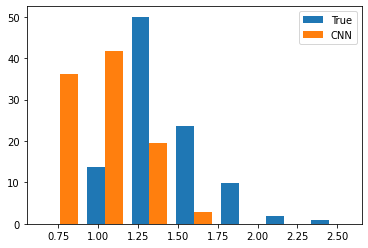

In [50]:
A = plt.hist(X,weights=wts,bins=7)
plt.legend(['True','CNN'])

In [51]:
print('ImgJ:','media=',np.mean(np.array(Diam1)),'desvio=',np.std(np.array(Diam1)),'pontos=',len(Diam1))

ImgJ: media= 1.4365604096576146 desvio= 0.2749068872026991 pontos= 102


In [52]:
print('Software:','media=',np.mean(np.array(Diameter_All)),'desvio=',np.std(np.array(Diameter_All)),'pontos=',len(Diameter_All))

Software: media= 0.9968404165265975 desvio= 0.2301430499896455 pontos= 36


In [53]:
# Software: media= 1.3185563233999378 desvio= 0.2728642468732428 pontos= 66 theshold =0.8 e repete=80
# Software: media= 1.2650227960747715 desvio= 0.22942393421076387 pontos= 20 theshold =0.5 e repete=40

In [54]:
np.mean(np.array(Diameter_All))

0.9968404165265975

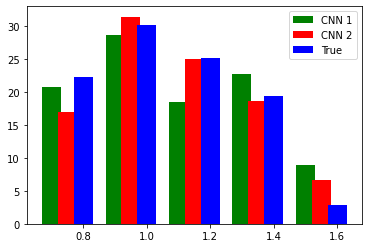

In [55]:
# Freq1 = [19.12043703, 29.22484843, 19.35872174, 20.82190224, 11.47409056] # avarage 4 samples
Freq1 = [20.69301557, 28.55598044, 18.50768331, 22.7106327, 8.905907357] # avarage 10 samples
#Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.233810752, 0.4]
Freq2 = [16.93792791, 31.38008965, 24.93810752, 18.56158392, 6.633810752]
Freq3 = [22.22489, 30.15078, 25.10463, 19.30926, 2.810434]
barWidth = 0.25

br1 = range(len(Freq1))
# Set position of bar on X axis
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# labels = [0.8, 1.0, 1.2, 1.4, 1.6, 1.8]
labels = [0.8, 1.0, 1.2, 1.4, 1.6]

xx=[]
for a in labels:
  xx.append(str(a))
plt.bar(br1, Freq1 , color="green", align="center", width=0.3, tick_label= xx) 
plt.bar(br2, Freq2 , color="red", align="center", width=0.3, tick_label= xx)
plt.bar(br3, Freq3 , color="blue", align="center", width=0.3, tick_label= xx)
plt.legend(['CNN 1','CNN 2','True'])